# Metody Obliczeniowe w Nauce i Technice Laboratorium 2
## Interpolacja
### Błażej Kustra

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

### Zadanie 1. Wielomiany interpolujące
Dla funkcji $f(x) = \frac{1}{ 1+x^2 }$ i n = 5,10,15 wylicz wielomian interpolacyjny $p_{n}$ z $n+1$ węzłami równoodległbymi w przedziale $\lbrack-5,5\rbrack$

 * Narysuj funkcje $f(x)$ oraz $p_{n}(x)$
 * Wylicz i narysuj reszty interpolacji $e(x) = f(x) − p_{n}(x)$ w 30 równoodległych punktach powyższego przedziału.
 
Do zinterpolowania funkcji wykorzystam interpolację wielomianową z macierzą Vandermonda.

In [17]:
def function(x):
    return 1.0 / (1.0 + x ** 2.0)


def approximation(n, count=500):
    results = []
    x = np.linspace(-5, 5, n + 1)
    vander_x = np.vander(x, n + 1, True)
    coefficients = np.linalg.solve(vander_x, list(map(function, x)))

    for x in np.linspace(-5, 5, count):
        result = 0
        for index, coefficient in enumerate(coefficients):
            result += coefficient * (x ** index)
        results.append(result)

    return results

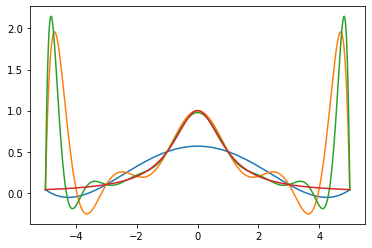

In [18]:
plt.plot(np.linspace(-5, 5, 500), approximation(5))
plt.plot(np.linspace(-5, 5, 500), approximation(10))
plt.plot(np.linspace(-5, 5, 500), approximation(15))

real_function = []
for x in np.linspace(-5, 5, 500):
    real_function.append(function(x))

plt.plot(np.linspace(-5, 5, 500), real_function)
plt.show()

* <span style="color: red">czerwony</span> - oryginalna funkcja
* <span style="color: blue">niebieski</span> - dla 5 punktów
* <span style="color: orange">pomarańczowy</span> - dla 10 punktów
* <span style="color: green">zielony</span> - dla 15 punktów

Jak widać funkcja na końcach przedziału mocno rozjeżdża się. Jest to tak zwnany efekt Rungego. Takie zachowanie występuje gdy interpolujemy za pomocą wielomianu wysokiego stopnia **przy stałych odległościach węzłów**.

In [8]:
def calculate_difference(n):
    results = approximation(n, 30)
    x = np.linspace(-5, 5, 30)

    results = list(map(lambda x, y: x - y, results, list(map(function, x))))

    return results

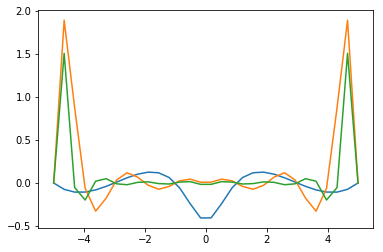

In [33]:
plt.plot(np.linspace(-5, 5, 30), calculate_difference(5))
plt.plot(np.linspace(-5, 5, 30), calculate_difference(10))
plt.plot(np.linspace(-5, 5, 30), calculate_difference(15))
plt.show()

* <span style="color: blue">niebieski</span> - błąd dla 5 punktów
* <span style="color: green">zielony</span> - błąd dla 10 punktów
* <span style="color: orange">pomarańczowy</span> - błąd dla 15 punktów

Aby uniknąć tego błędu na krańach przedziału, stosuje się interpolację z węzłami coraz gęściej upakowanymi na krańcach przedziału interpolacji.

### Zadanie 2. Wielomiany interpolujące

Dla danej funkcji i przedziału z poprzedniego zadania oraz $n = 15$ znajdź wielomian interpolacyjny w węzłach Czebyszewa, danych wzorem $ x_{k} = \frac{1}{2}(a+b) + \frac{1}{2}(b-a)cos(\frac{2k-1}{2n}\pi) $ gdzie $k = 1, .., n,$. $a, b$ są odpowiednio początkiem i końcem przedziału interpolacji. Narysuj wykres wynikowego wielomianu. W jaki sposób zmienił się błąd interpolacji w porównaniu do wyników z poprzedniego zadania? Czemu tak się stało?

In [20]:
def count_chebyshev_x(n, k, a, b):
    return ((1.0 / 2.0) * (a + b)) + ((1.0 / 2.0) * (b - a) * np.cos(((2.0 * k - 1.0) * np.pi) / (2.0 * n)))


def chebyshev_approximation(n):
    results = []
    x = []
    for i in range(1, n + 1):
        x.append(count_chebyshev_x(n, i, -5, 5))

    vander_x = np.vander(x, n , True)
    coefficients = np.linalg.solve(vander_x, list(map(function, x)))

    for x in np.linspace(-5, 5, 500):
        result = 0
        for index, coefficient in enumerate(coefficients):
            result += coefficient * (x ** index)
        results.append(result)

    return results

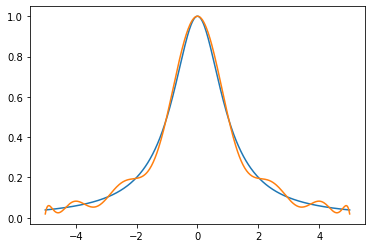

In [27]:
plt.plot(np.linspace(-5, 5, 500), real_function)
plt.plot(np.linspace(-5, 5, 500), chebyshev_approximation(15))
plt.show()

* <span style="color: blue">niebieski</span> - oryginalna funkcja
* <span style="color: orange">pomarańczowy</span> - dla 15 punktów

Błąd interpolacji na końcach przedziału drastycznie zmalał dzięki zastosowaniu interpolakcji w węzłach Czebyszewa. Wszystko dzięki znacznemu zagęszczeniu punktów na końcu przedziału. Dodatkowo można zauważyć nieznaczne pogorszenie dokładności interpolacji w centralnej części, dzieje się tak ze względu na zmienjszoną ilość punktów w centralnej części.

### Zadanie 3. Interpolacja krzywych funkcjami sklejanymi

Mamy daną elipsę w postaci parametrycznej
$$
\begin{align}
\begin{cases}
x = a \cdot cos(t)\\
y = b \cdot sin(t)\\
\end{cases}
\end{align}
$$

gdzie $t ∈ [0, 2π]$ wykonaj jej interpolację sześciennymi funkcjami sklejanymi dla 10 równoodległych wartości $t_{i}$. Interpolację wykonaj osobno dla zbiorów punktów $(t_{i}, x_{i})$ oraz $(t_{i}, y_{i})$. Następnie narysuj przybliżenie powyższej elipsy używając wyznaczonych funkcji dla 30 punktów.

In [20]:
a = 10
b = 5


def function_x(t):
    return a * np.cos(t)


def function_y(t):
    return b * np.sin(t)


def interpolate_elipse(n,final_plot = 30):
    points = np.linspace(0, 2 * np.pi, n)

    spline_x = interpolate.interp1d(points, list(map(function_x, points)), kind='cubic')
    spline_y = interpolate.interp1d(points, list(map(function_y, points)), kind='cubic')

    xs = []
    ys = []

    for t in np.linspace(0, 2 * np.pi, final_plot):
        xs.append(spline_x(t))
        ys.append(spline_y(t))

    plt.plot(xs, ys)

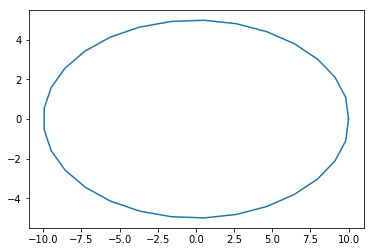

In [21]:
interpolate_elipse(10)
plt.show()

Interpolacja przy pomocy funkcji sklejanych **[z angielskiego - spline]**: 
 * Wielomian interpolujący jest tworzony oddzielnie dla każdego odcinka pomiędzy dwoma kolejnymi węzłami. 
 * Współczynniki wielomianów obowiązujących na poszczególnych odcinkach są wyznaczane tak, aby w węzłach zapewnić ciągłość nie tylko funkcji interpolującej ale także jej pochodnych do stopnia 1−n włącznie.

Dzięki zastosowaniu tej metody, otrzymujemy bardzo zadowalające przybliżenie dla 10 równoodległych punktów.

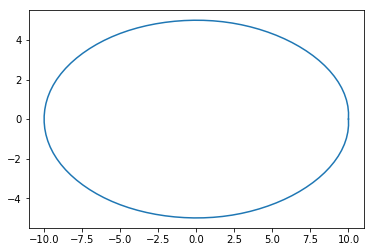

In [22]:
interpolate_elipse(10,100)

Wykres przybliżający elipse dla 100 punktów wygląda identycznie do oryginalnej elipsy.